<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-Desafio1/blob/main/desafio7-titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapa 1 - Inserindo o arquivo contendo os dados provenientes na pasta WoMakersCode no google drive.

Passo 1: Extração (Extract)

In [ ]:
import pandas as pd

file_id = "1ylUuhGk_qh_FivQ-pHI7KFY9-r1H7pH1"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)
df.head(10)  # Exibe as primeiras linhas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Passo 2: Mostrando a qualidade dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Passo 3: Transformação dos dados, pois os Dtypes não estão condisentes.

Por que essas mudanças?
Survived como bool → Melhora a interpretação dos dados (0 = False, 1 = True).
category para Sex, Embarked e Cabin → Reduz o consumo de memória e melhora performance ao trabalhar com valores categóricos.

In [ ]:
# Converter colunas para tipos mais adequados
df["Survived"] = df["Survived"].astype(bool)  # 0 e 1 viram True e False
df["Sex"] = df["Sex"].astype("category")  # Reduz o uso de memória
df["Embarked"] = df["Embarked"].astype("category")
df["Cabin"] = df["Cabin"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(4), object(2)
memory usage: 65.6+ KB


Passo 4: Ainda em transformações vamos analisar a quantidade de nulos nos dados.

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


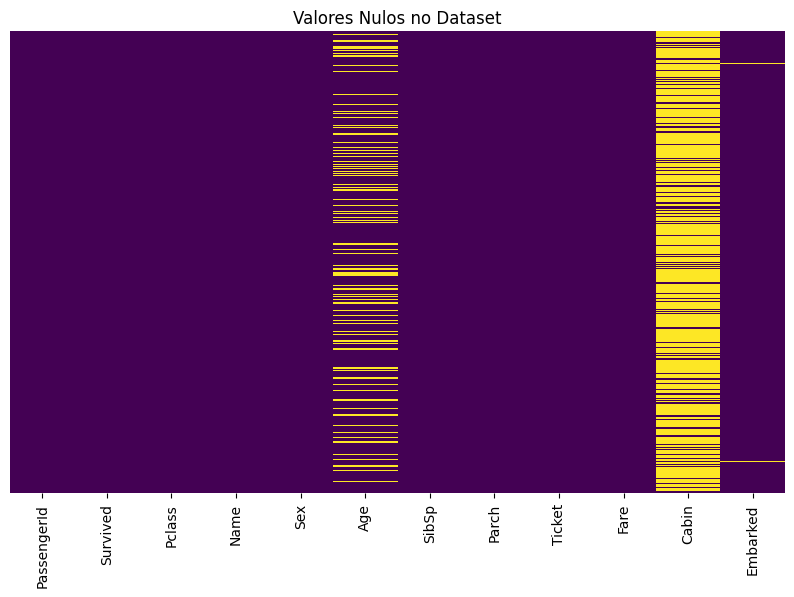

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valores Nulos no Dataset")
plt.show()

Passo 5: Tratamento dos nulos.
Análise dos Valores Nulo

Age -	[177	~19.9%]	Importante para análises, pode preencher com a mediana ou agrupar por Pclass e Sex.

Cabin -	[687	~77.1%]	Muitos nulos! Pode descartar ou criar uma nova variável indicando se o passageiro tem ou não cabine.

Embarked -	[2	0.2%]	Poucos nulos, pode preencher com o valor mais frequente (moda).

In [ ]:
df["Age"].fillna(df["Age"].median(), inplace=True)#Preencher Age com a mediana (melhor que a média, pois evita distorções)
df["HasCabin"] = df["Cabin"].notnull().astype(int)  # 1 = tem cabine, 0 = não tem Criar uma nova coluna HasCabin para indicar se o passageiro tinha cabine
df.drop(columns=["Cabin"], inplace=True) #E depois podemos remover a coluna original
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True) #Preencher Embarked com a moda (porto mais comum)


<ipython-input-43-99eb243a8578>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)#Preencher Age com a mediana (melhor que a média, pois evita distorções)
<ipython-input-43-99eb243a8578>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

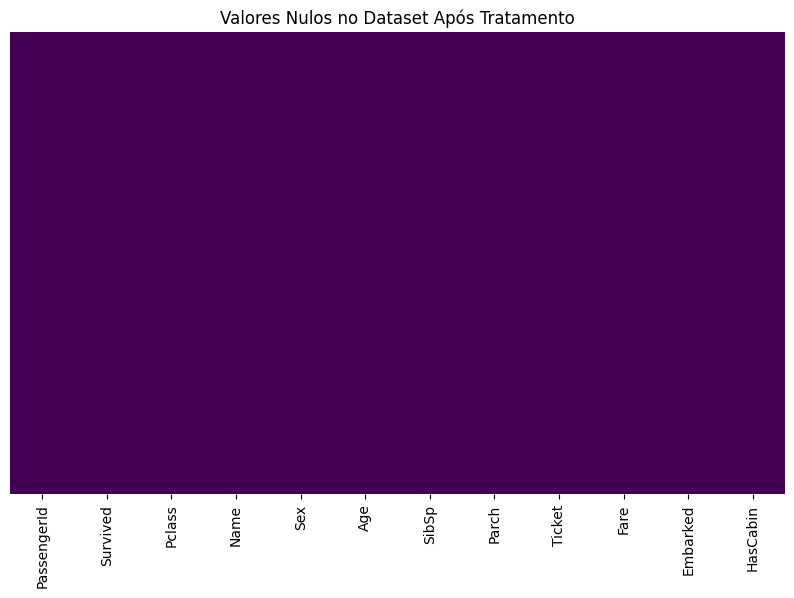

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Valores Nulos no Dataset Após Tratamento")
plt.show()


Passo 6: Verificar outliers na coluna Fare (Tarifa)
A tarifa pode ter valores extremos que distorcem as análises. Podemos visualizar isso


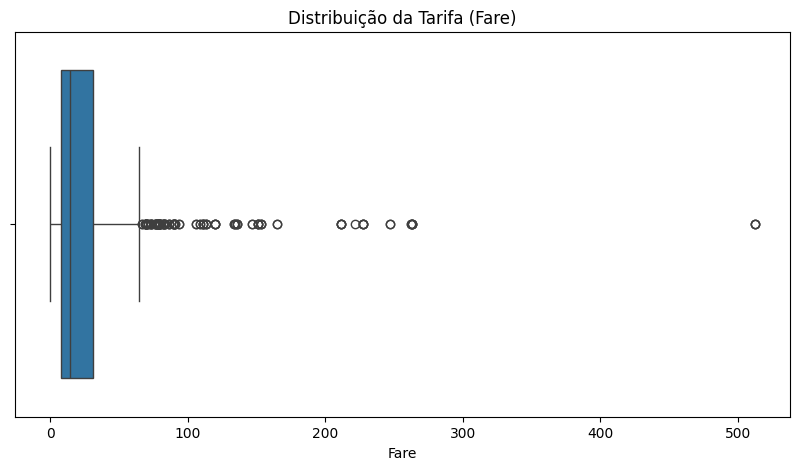

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x=df["Fare"])
plt.title("Distribuição da Tarifa (Fare)")
plt.show()


Os outliers absurdos existentes vão atrapalhar as próximas etapas então podemos limitar com um percentual de 95%

In [ ]:
df["Fare"] = df["Fare"].clip(upper=df["Fare"].quantile(0.95))  # Limita ao 95º percentil

Passo 7: Criar uma nova variável para identificar adultos e crianças

Como você quer comparar sobrevivência entre adultos e crianças, podemos criar uma coluna IsChild:

In [ ]:
df["IsChild"] = df["Age"] < 18  # Considera crianças menores de 18 anos

Pronto o código está pronto para seguir nos próximos passos para responder as perguntas.